In [1]:
# Cuaderno de pruebas para tratamiento de formas de onda
# IDENTIFICACION y LOCALIZACION de Tremors No Volcanicos (TNV) en el Valle Medio del Magdalena (VMM)
# Curaduria de Sismicidad - Centro de Transparencia (CDT)
# Autor: Jose Manuel Ramirez Martinez
# Correo: josmramirezmar@unal.edu.co

# Declaracion de las librerias
try: 
    import time
    t=time.time()
    print("Cargando librerias...")
    import numpy as np
    import matplotlib.pyplot as plt
    
    import obspy
    import cartopy
    from obspy.clients.filesystem.sds import Client
    from obspy.clients.fdsn import Client as ClientF 
    from obspy import UTCDateTime,Stream,read_inventory,read
    from obspy.signal.trigger import z_detect,plot_trigger
    import wget
    from os import mkdir
    from threading import Thread
    from datetime import datetime
    import pandas as pd
    %matplotlib widget
    #from xcorr import correlate_maxlag, correlate_template, get_lags
    secs = time.time() - t
    print(f"Librerias cargadas en {secs} segundos.")
except Exception as e:
    print("Error cargando una libreria:", str(e))

Cargando librerias...
Librerias cargadas en 4.458674192428589 segundos.


Inventory created at 2022-06-07T22:22:26.989612Z
	Created by: ObsPy 1.3.0
		    https://www.obspy.org
	Sending institution: ObsPy's obspy.io.xseed version 1.3.0
	Contains:
		Networks (2):
			CM, YU
		Stations (20):
			CM.AGCC (Aguachica, Cesar, Colombia)
			CM.CHI (Chingaza, Cundinamarca)
			CM.CVER (Cerro Cruz Verde, Chipaque, Cundinamarca, Colombia)
			CM.GUY2C (Villamaria, Caldas, Colombia)
			CM.LL8C (Chimichagua, Cesar, Colombia)
			CM.NOR (Norcasia, Caldas, Colombia)
			CM.OCA (Ocana, Norte de Santander, Colombia)
			CM.PTB (Puerto Berrio, Antioquia, Colombia)
			CM.ROSC (El Rosal, Cundinamarca, Colombia)
			CM.RUS (La Rusia, Boyaca, Colombia)
			CM.SJC (San Jacinto, Bolivar, Colombia)
			CM.SPBC (San Pablo de Borbur, Boyaca, Colombia)
			CM.VIL (Villavicencio, Meta, Colombia)
			CM.VMM05 (San Martin, Cesar, Colombia)
			CM.VMM09 (Lebrija, Santander, Colombia)
			CM.VMM10 (El Carmen de Chucuri, Santander, Colombia)
			CM.VMM11 (Sabana de Torres, Santander)
			CM.VMM12 (Simiti,Bol

c:\Users\josmr\anaconda3\envs\obspy\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
c:\Users\josmr\anaconda3\envs\obspy\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
c:\Users\josmr\anaconda3\envs\obspy\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
c:\Users\josmr\anaconda3\envs\obspy\li

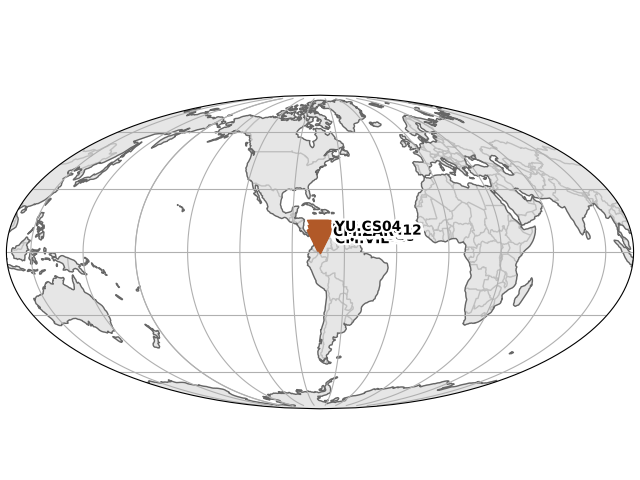

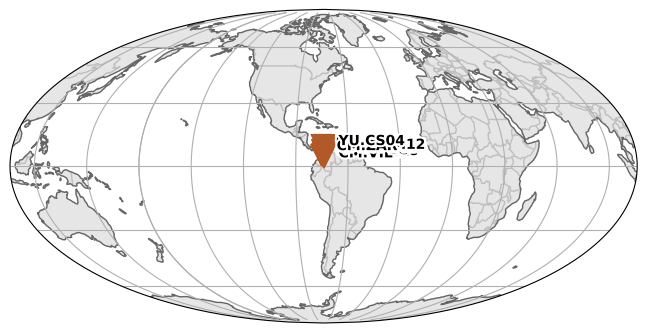

In [2]:
# A
inv=read_inventory("..\\archivo\\CM.CDT.01.dataless")
print(inv)
inv.plot()
#lientSGC = ClientF('http://sismo.sgc.gov.co:8080/')


In [ ]:

timeStart = UTCDateTime('2022-04-06T17:40:00')
endTime = UTCDateTime('2022-04-07T17:40:00') + (4*60)

st = clientSGC.get_waveforms('CM', 'CHI', '*', 'HHZ', timeStart, endTime)
print(st)
st1 = clientSGC.get_waveforms('CM', 'CVER', '*', 'HHZ', timeStart, endTime)
print(st1)
st.append(st1[0])
print(st)
#st.write("G:\\Mi unidad\\RSUNAL\\TNV\\Python\\TNV\\archive\\prueba.mseed", format="MSEED")

In [ ]:
print("RAWS")
#st.plot(method='full', equal_scale=False)

In [ ]:
print('Detrend')
st.detrend()
#st.plot(method='full', equal_scale=False)

In [ ]:
print('Filtro')
st.filter("bandpass", freqmin=1, freqmax=3, corners=2, zerophase=True)
#st.plot(method='full', equal_scale=False)

In [ ]:
print('Normalizado')
st.normalize(global_max=False) 
#st.plot(method='full', equal_scale=False)

In [ ]:
df = st[1].stats.sampling_rate
cft = z_detect(st[1].data, int(10 * df))
plot_trigger(st[1], cft, 0.5, 0.5)